In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),          
    transforms.Normalize((0.5,), (0.5,))  
])

train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# The dataset is now loaded.
# Creating the neural network below. It has 3 layers (one hidden layers) moving from neurons of 784 nos --> 128 nos --> 10 nos.

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)   
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [4]:
model=NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training the model through the entire dataset 5 times.

for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.2867
Epoch 2, Loss: 0.3511
Epoch 3, Loss: 0.0171
Epoch 4, Loss: 0.3789
Epoch 5, Loss: 0.2577


In [6]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
accuracy

0.9649

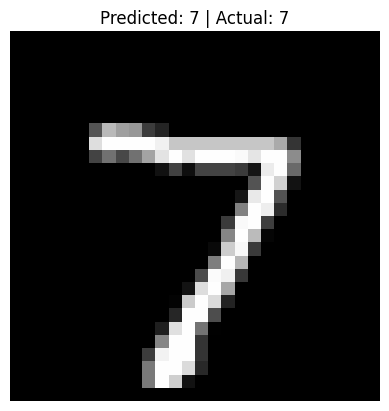

In [14]:
# The accuracy is shown above.
# A demo on a random data element.

images, labels = next(iter(test_loader))

img = images[0]          
true_label = labels[0]
img_batch = img.unsqueeze(0)  

with torch.no_grad():
    output = model(img_batch)
    _, predicted = torch.max(output, 1)

plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"Predicted: {predicted.item()} | Actual: {true_label.item()}")
plt.axis("off")
plt.show()